In [1]:
from test_multiple import all_expnames
import os
import pickle
import numpy as np

In [3]:
for expnames in all_expnames:
    # load metadata for experiments
    allowed_to_continue = True
    for i, expname in enumerate(expnames):
        try:
            metadata = {}
            with open('save/{}/metadata.txt'.format(expname), 'r') as f:
                for line in f:
                    # Strip white space and split by colon
                    key, value = line.strip().split(': ')
                    # Convert numerical values from strings
                    if value.replace('.', '', 1).isdigit():
                        if '.' in value:
                            value = float(value)
                        else:
                            value = int(value)
                    # Add to dictionary
                    metadata[key] = value
        except:
            print('No metadata found for experiment {}'.format(expnames[0]))
            allowed_to_continue = False
            continue
        if 'runtime' not in metadata:
            print('No runtime found for experiment {}'.format(expnames[0]))
            allowed_to_continue = False
            continue

    if allowed_to_continue:
        # check experiment shift
        if metadata['dataset'] == 'cifar10':

            if metadata['shift'] == 'label':
                try:
                    # load A_within.pkl and V_within.pkl from all three experiments in expnames
                    with open('save/{}/CIFAR_A_within.pkl'.format(expnames[0]), 'rb') as f:
                        A_within1 = pickle.load(f)
                    with open('save/{}/CIFAR_V_within.pkl'.format(expnames[0]), 'rb') as f:
                        V_within1 = pickle.load(f)
                    with open('save/{}/CIFAR_A_within.pkl'.format(expnames[1]), 'rb') as f:
                        A_within2 = pickle.load(f)
                    with open('save/{}/CIFAR_V_within.pkl'.format(expnames[1]), 'rb') as f:
                        V_within2 = pickle.load(f)
                    with open('save/{}/CIFAR_A_within.pkl'.format(expnames[2]), 'rb') as f:
                        A_within3 = pickle.load(f)
                    with open('save/{}/CIFAR_V_within.pkl'.format(expnames[2]), 'rb') as f:
                        V_within3 = pickle.load(f)
                except:
                    print('No CIFAR_A_within.pkl or CIFAR_V_within.pkl found for experiment {}'.format(expnames[0]))
                    continue

                all_accs1 = np.concatenate((A_within1, V_within1))
                all_accs2 = np.concatenate((A_within2, V_within2))
                all_accs3 = np.concatenate((A_within3, V_within3))

                mins = [np.min(all_accs1), np.min(all_accs2), np.min(all_accs3)]
                maxs = [np.max(all_accs1), np.max(all_accs2), np.max(all_accs3)]
                stds = [np.std(all_accs1), np.std(all_accs2), np.std(all_accs3)]

                experiment_name = ''
                # if name contains '5epochs', set the add '5epochs' to the experiment name
                if '5epochs' in expnames[0]:
                    experiment_name = '5epochs'
                if '10epochs' in expnames[0]:
                    experiment_name = '10epochs'
                # expermiment name is expnames[0] but remove everything after 'seed' and remove 'seed' from the name
                experiment_name += expnames[0].split('seed')[0][:-1]

                # dump to pickle file test_accuracies/experiment_name.pkl
                with open('acc_distributions/{}.pkl'.format(experiment_name), 'wb') as f:
                    pickle.dump([mins, maxs, stds], f)
            
            elif metadata['shift'] == '5_clusters':
                try:
                    # load CIFAR_acc_matrix.pkl from all three experiments in expnames
                    with open('save/{}/CIFAR_acc_matrix.pkl'.format(expnames[0]), 'rb') as f:
                        CIFAR_acc_matrix1 = pickle.load(f)
                    with open('save/{}/CIFAR_acc_matrix.pkl'.format(expnames[1]), 'rb') as f:
                        CIFAR_acc_matrix2 = pickle.load(f)
                    with open('save/{}/CIFAR_acc_matrix.pkl'.format(expnames[2]), 'rb') as f:
                        CIFAR_acc_matrix3 = pickle.load(f)
                except:
                    print('No CIFAR_acc_matrix.pkl found for experiment {}'.format(expnames[0]))
                    continue

                all_accs1 = []
                for i in range(5):
                    for client_idx in range(20):
                        all_accs1.append(CIFAR_acc_matrix1[i,i,client_idx])

                all_accs2 = []
                for i in range(5):
                    for client_idx in range(20):
                        all_accs2.append(CIFAR_acc_matrix2[i,i,client_idx])
                
                all_accs3 = []
                for i in range(5):
                    for client_idx in range(20):
                        all_accs3.append(CIFAR_acc_matrix3[i,i,client_idx])
                
                mins = [np.min(all_accs1), np.min(all_accs2), np.min(all_accs3)]
                maxs = [np.max(all_accs1), np.max(all_accs2), np.max(all_accs3)]
                stds = [np.std(all_accs1), np.std(all_accs2), np.std(all_accs3)]

                # expermiment name is expnames[0] but remove everything after 'seed' and remove 'seed' from the name
                experiment_name = expnames[0].split('seed')[0][:-1]

                # dump to pickle file acc_distributions/experiment_name.pkl
                with open('acc_distributions/{}.pkl'.format(experiment_name), 'wb') as f:
                    pickle.dump([mins, maxs, stds], f)





No metadata found for experiment CIFAR_label_DAC_invloss_tau_10_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_invloss_tau_10_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_invloss_tau_10_seed_1_fixed
No metadata found for experiment fashion_MNIST_DAC_priorweight_cosine_origin_tau_300_seed_1
No metadata found for experiment fashion_MNIST_DAC_priorweight_cosine_origin_tau_300_seed_1
No metadata found for experiment fashion_MNIST_DAC_priorweight_cosine_origin_tau_300_seed_1
No metadata found for experiment CIFAR_label_DAC_l2_tau_30_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_l2_tau_30_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_l2_tau_30_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_cosine_tau_300_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_cosine_tau_300_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_cosine_tau_300_seed_1_fixed
No metadata found for experiment CIFAR_label_D

CIFAR_5_clusters_DAC_priorweight_l2_tau_10.pkl
min: [71.4, 71.0, 74.7]
max: [91.15, 91.35, 92.05]
std: [5.5058229176027815, 6.185807869631904, 5.727249317953603]
CIFAR_label_DAC_priorweight_invloss_tau_5.pkl
min: [47.85, 51.483333333333334, 48.916666666666664]
max: [71.675, 76.95, 74.425]
std: [7.899041293797058, 10.205118928957498, 9.127696884193854]
CIFAR_5_clusters_DAC_cosine_tau_1000.pkl
min: [73.1, 72.55, 75.5]
max: [92.6, 92.45, 93.4]
std: [5.872990613818483, 5.862002111053869, 5.74187251687113]
5epochsCIFAR_label_DAC_invloss_tau_10.pkl
min: [24.2, 24.75, 30.816666666666666]
max: [66.775, 68.425, 66.15]
std: [9.938037092404112, 10.90819080502761, 8.315502371741857]
CIFAR_5_clusters_DAC_cosine_origin_tau_300.pkl
min: [72.05, 73.95, 75.75]
max: [92.65, 92.85, 92.85]
std: [5.666072272747676, 6.113706813382531, 5.360645390249201]
CIFAR_label_DAC_priorweight_cosine_tau_200.pkl
min: [46.666666666666664, 47.56666666666667, 47.5]
max: [70.15, 72.925, 71.775]
std: [7.882014235569626, 9.25

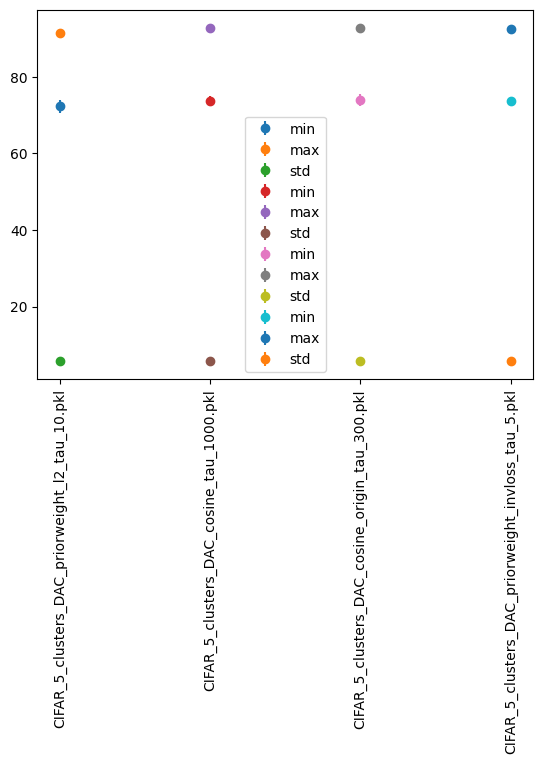

In [5]:
import matplotlib.pyplot as plt

for filename in os.listdir('acc_distributions/'):
    with open('acc_distributions/{}'.format(filename), 'rb') as f:
        mins, maxs, stds = pickle.load(f)
        print(filename)
        print('min:', mins)
        print('max:', maxs)
        print('std:', stds)

    if '5_clusters' in filename:
        plt.figure(1)
        plt.errorbar(filename, np.mean(mins), yerr=np.std(mins), fmt='o', label='min')
        plt.errorbar(filename, np.mean(maxs), yerr=np.std(maxs), fmt='o', label='max')
        plt.errorbar(filename, np.mean(stds), yerr=np.std(stds), fmt='o', label='std')


plt.figure(1)
plt.legend()
# rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

CIFAR_5_clusters_DAC_priorweight_l2_tau_10.pkl
min: [71.4, 71.0, 74.7]
max: [91.15, 91.35, 92.05]
CIFAR_label_DAC_priorweight_invloss_tau_5.pkl
min: [47.85, 51.483333333333334, 48.916666666666664]
max: [71.675, 76.95, 74.425]
CIFAR_5_clusters_DAC_cosine_tau_1000.pkl
min: [73.1, 72.55, 75.5]
max: [92.6, 92.45, 93.4]
5epochsCIFAR_label_DAC_invloss_tau_10.pkl
min: [24.2, 24.75, 30.816666666666666]
max: [66.775, 68.425, 66.15]
CIFAR_5_clusters_DAC_cosine_origin_tau_300.pkl
min: [72.05, 73.95, 75.75]
max: [92.65, 92.85, 92.85]
CIFAR_label_DAC_priorweight_cosine_tau_200.pkl
min: [46.666666666666664, 47.56666666666667, 47.5]
max: [70.15, 72.925, 71.775]
CIFAR_label_DAC_priorweight_cosine_origin_tau_200.pkl
min: [49.15, 47.63333333333333, 40.46666666666667]
max: [72.45, 76.3, 73.1]
CIFAR_5_clusters_DAC_priorweight_invloss_tau_5.pkl
min: [72.35, 73.85, 74.8]
max: [92.15, 92.55, 92.65]
5epochsCIFAR_label_DAC_l2_tau_30.pkl
min: [24.2, 25.933333333333334, 26.933333333333334]
max: [61.075, 62.3, 62

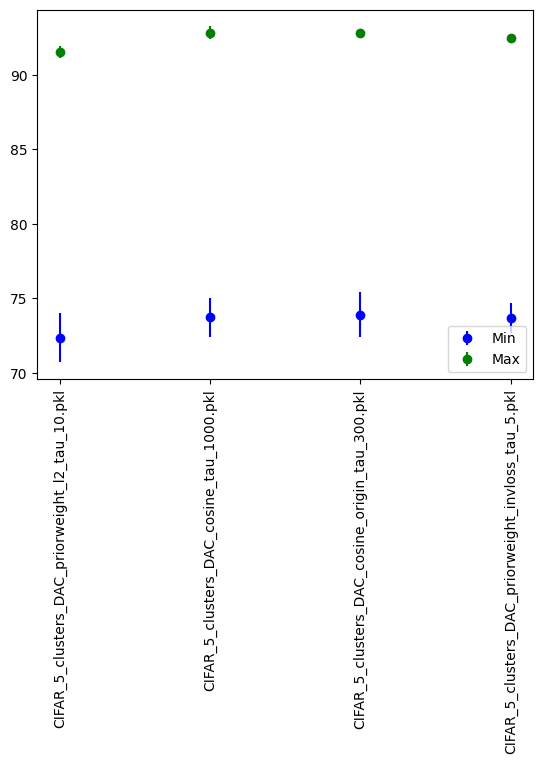

In [7]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

# Define specific colors for each label
color_min = 'blue'
color_max = 'green'
#color_std = 'red'

# Initialize flags to add legend labels only once
label_min_added = False
label_max_added = False
#label_std_added = False

for filename in os.listdir('acc_distributions/'):
    with open(f'acc_distributions/{filename}', 'rb') as f:
        mins, maxs, stds = pickle.load(f)
        print(filename)
        print('min:', mins)
        print('max:', maxs)
        #print('std:', stds)

    if '5_clusters' in filename:
        plt.figure(1)
        # Add legend labels only once
        if not label_min_added:
            plt.errorbar(filename, np.mean(mins), yerr=np.std(mins), fmt='o', color=color_min, label='Min')
            label_min_added = True
        else:
            plt.errorbar(filename, np.mean(mins), yerr=np.std(mins), fmt='o', color=color_min)

        if not label_max_added:
            plt.errorbar(filename, np.mean(maxs), yerr=np.std(maxs), fmt='o', color=color_max, label='Max')
            label_max_added = True
        else:
            plt.errorbar(filename, np.mean(maxs), yerr=np.std(maxs), fmt='o', color=color_max)

        #if not label_std_added:
        #    plt.errorbar(filename, np.mean(stds), yerr=np.std(stds), fmt='o', color=color_std, label='Std')
        #    label_std_added = True
        #else:
        #    plt.errorbar(filename, np.mean(stds), yerr=np.std(stds), fmt='o', color=color_std)

plt.figure(1)
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.show()
